## Install packages

In [8]:
## install packages

# %pip install matplotlib
# %pip install pandas
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [9]:
## import packages
import matplotlib.pyplot as plt
import pandas as pd
import os
from dotenv import load_dotenv

## Import data

In [10]:
# Load environment variables from .env file
load_dotenv()

True

In [11]:
path_file = os.getenv('PATH_FILE')

In [20]:
gdp_data = pd.read_csv(path_file+'estat_nama_10_gdp_en.csv')
pc_data = pd.read_csv(path_file+'estat_nama_10_pc_en.csv')

C:\Users\LidewijHeerkens\AppData\Local\Temp\ipykernel_24244\549028249.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  gdp_data = pd.read_csv(path_file+'estat_nama_10_gdp_en.csv')


## Visualizations

In [21]:
## Create countrylist
country_list = ['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Portugal', 'Slovakia', 'Slovenia', 'Spain']

## select years
year_list = [2014, 2017, 2020, 2023]


### Visualise GDP per country for the Euro area (current prices, million euros)

In [22]:
def visualize_GDP(df, year):
    """
    Function to visualize GDP per country in a bar chart per year
    """

    ## Filter data frame on unit, item, country and year
    df = df[(df['unit'] == 'Current prices, million euro') & 
            (df['na_item'] == 'Gross domestic product at market prices') &
            (df['geo'].isin(country_list)) &
            (df['TIME_PERIOD'] == year)]
        

    # Create a bar chart
    df.plot(y='OBS_VALUE', x='geo', kind='bar', legend=False)
    plt.show()

2014


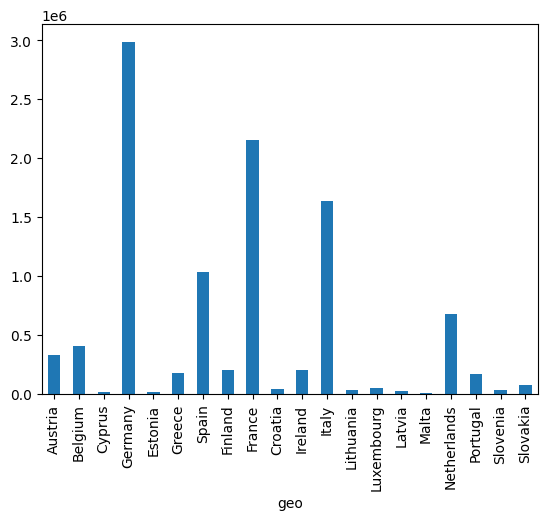

2017


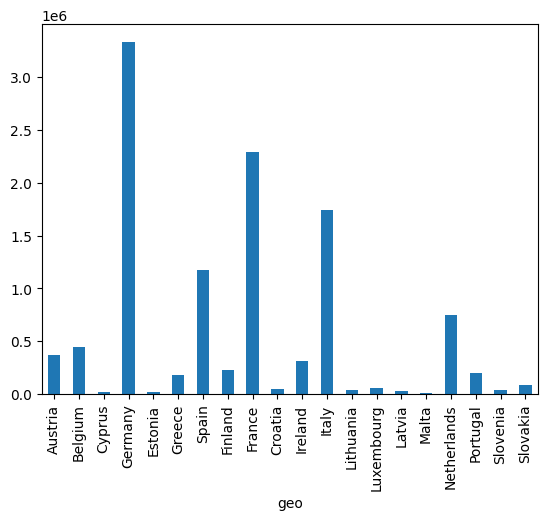

2020


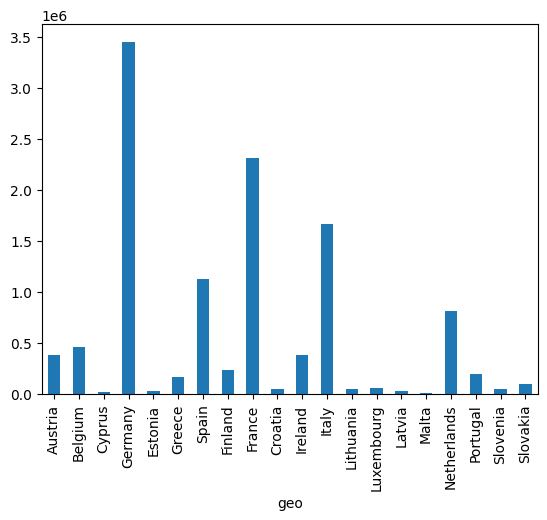

2023


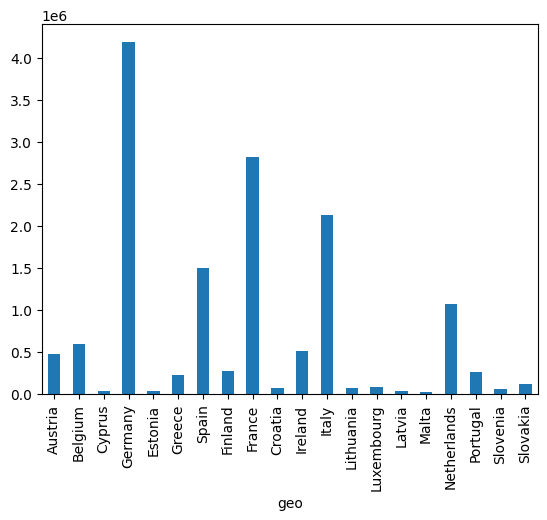

In [23]:
for year in year_list:
    print(year)
    visualize_GDP(gdp_data, year)

### Visualise GDP per capita per country for the Euro area (current prices, euro per capita)

In [25]:
def visualize_PC(df, year):
    """
    Function to visualize GDP per country in a bar chart per year
    """

    ## Filter data frame on unit, item, country and year
    df = df[(df['unit'] == 'Current prices, euro per capita') & 
            (df['na_item'] == 'Gross domestic product at market prices') &
            (df['geo'].isin(country_list)) &
            (df['TIME_PERIOD'] == year)]


    # Create a bar chart
    df.plot(y='OBS_VALUE', x='geo', kind='bar', legend=False)
    plt.show()

2014


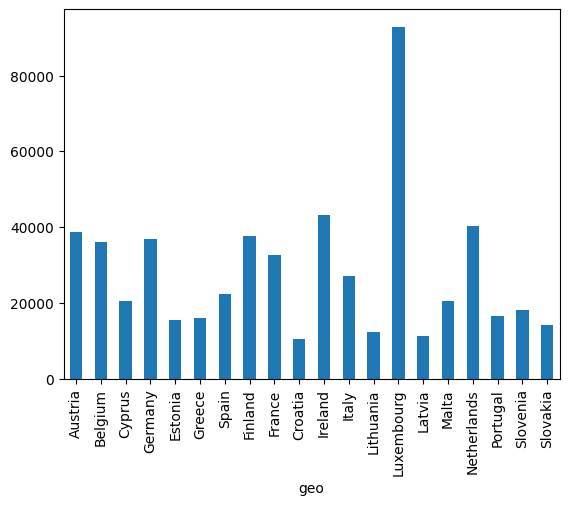

2017


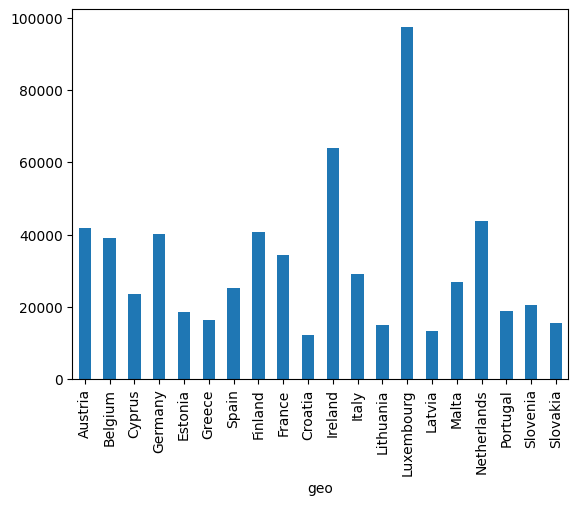

2020


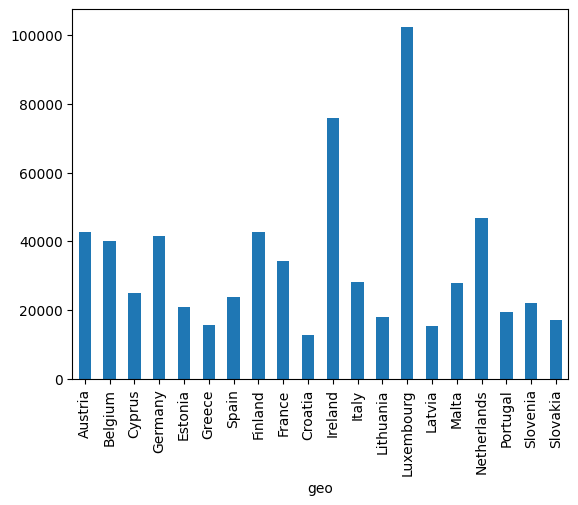

2023


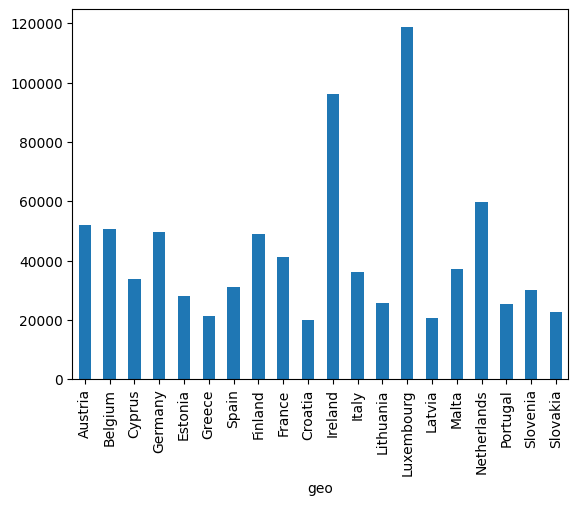

In [26]:
for year in year_list:
    print(year)
    visualize_PC(pc_data, year)

## Merge and save to CSV

In [30]:
## Select 2023 data from gdp_data
gdp_data_2023 = gdp_data[gdp_data['TIME_PERIOD'] == 2023]

## Select 2023 data from pc_data
pc_data_2023 = pc_data[pc_data['TIME_PERIOD'] == 2023]


In [ ]:
## Merge 2023 datasets
merged_gdp_2023_df = gdp_data_2023[['geo', 'OBS_VALUE']].merge(pc_data_2023[['geo', 'OBS_VALUE']], on='geo', suffixes=('_gdp', '_gdp_pc'))

## Export to csv
merged_gdp_2023_df.to_csv('merged_gdp_2023_data.csv', index = False)